In [1]:
# 무작정 시리즈 1 - 개와 고양이를 분류 모델 만들기

In [2]:
# MNIST, 개와 고양이 분류, 치와와 머핀 분류 등 많은 분류 예제들이 예제라는 이유로 간과되고 있다.
# 나는 개와 고양이를 분류하는 모델을 작성할 수 있을까?

In [3]:
# %cd /content/drive/MyDrive/mujakjung/image

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

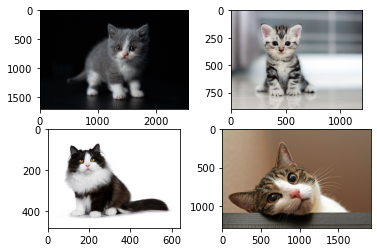

In [5]:
# 데이터 확인하기
data_path = "C:/Users/swwho/Desktop/vision/cats_and_dogs/"

for idx in range(1,5):
  plt.subplot(2,2,idx)
  img = plt.imread(data_path + "cats/cat_" + f"{idx}.jpg")
  plt.imshow(img)

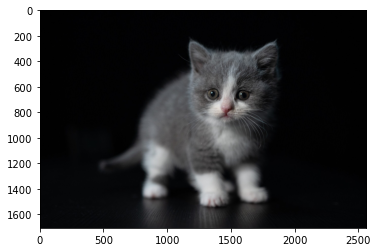

In [6]:
img = plt.imread(data_path + 'cats/cat_1.jpg')
plt.imshow(img)

In [7]:
os.listdir(data_path + 'cats/')

['cat_1.jpg',
 'cat_10.jpg',
 'cat_11.png',
 'cat_12.jpg',
 'cat_2.jpg',
 'cat_3.jpg',
 'cat_4.jpg',
 'cat_5.jpg',
 'cat_6.jpg',
 'cat_7.jpg',
 'cat_8.jpg',
 'cat_9.jpg']

In [8]:
# 이미지 데이터 배열로 변환하기
x_train = []
y_train = []
for c in ['cats', 'dogs']:
  for filename in os.listdir(data_path + f'{c}/'):
    img = image.load_img(data_path + f'{c}/{filename}', target_size=(256,256))
    img = image.img_to_array(img)
    img = img / 255
    x_train.append(img)
    if c == 'cats':
      y_train.append(1)
    else:
      y_train.append(0)

x_train = np.array(x_train)
y_train = np.array(y_train)
# x_train.shape, y_train.shape
# y_train = to_categorical(y_train)

In [9]:
print(x_train.shape)
print(y_train.shape)

(24, 256, 256, 3)
(24,)


In [10]:
# 모델 생성
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Input(shape=(256,256,3)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256, 256, 64)      256       
                                                                 
 dense_1 (Dense)             (None, 256, 256, 32)      2080      
                                                                 
 flatten (Flatten)           (None, 2097152)           0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2097153   
                                                                 
Total params: 2,099,489
Trainable params: 2,099,489
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='binary_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, epochs=30, verbose=1)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7150 - accuracy: 0.5000
Epoch 2/30
1/1 [==============================] - 0s 320ms/step - loss: 221.5767 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 345ms/step - loss: 2.1879 - accuracy: 0.5833
Epoch 4/30
1/1 [==============================] - 0s 343ms/step - loss: 110.4213 - accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 357ms/step - loss: 2.1745 - accuracy: 0.6250
Epoch 6/30
1/1 [==============================] - 0s 336ms/step - loss: 56.6528 - accuracy: 0.5000
Epoch 7/30
1/1 [==============================] - 0s 379ms/step - loss: 10.1184 - accuracy: 0.5000
Epoch 8/30
1/1 [==============================] - 0s 341ms/step - loss: 43.7041 - accuracy: 0.5417
Epoch 9/30
1/1 [==============================] - 0s 352ms/step - loss: 4.3846 - accuracy: 0.5833
Epoch 10/30
1/1 [==============================] - 0s 353ms/step - loss: 30.1308 - accuracy: 0.5417
Epoch 11/30
1/

1/1 [==============================] - 0s 228ms/step
0


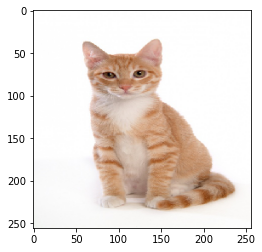

In [12]:
a = []
name = {0:'dog', 1:'cat'}
x = image.load_img("C:/Users/swwho/Desktop/cat.jpg", target_size=(256,256))
x = image.img_to_array(x)
x = x / 255
a.append(x)
a = np.array(a)
pred = model.predict(a)
print(round(*pred[0]))
plt.imshow(x)
plt.show()